plotting pid as a function of prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from torchmetrics import ConfusionMatrix
import torch
#path_to_db = "/groups/icecube/peter/storage/Multiclassification/Test/last_one_lvl3MC/dynedge_pid_test_run/results.csv"
#path_to_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/Inference/pid_Leon_RD_results_first.csv"
path_to_db = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/Inference/pid_40_days_sample_first.csv"
feature_data = pd.read_csv(path_to_db, index_col=[0])

/groups/icecube/qgf305/anaconda3/envs/graphnet/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]

In [3]:
print("unique particle ID's and their count: \n", feature_data[["pid_noise_pred","pid"]].groupby("pid").count())
print()
print("data:")
feature_data

unique particle ID's and their count: 
        pid_noise_pred
pid                  
-16.0         2356342
-14.0         6140114
-12.0         2508616
-1.0         61739862
 12.0         5655260
 14.0        13555279
 16.0         6257494

data:


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,7.730823e-01,8.663693e-04,0.226051,-1.0,0.0
1,6.010027e-11,9.091591e-01,0.090841,-1.0,1.0
2,4.313713e-12,9.999559e-01,0.000044,-1.0,2.0
3,9.879802e-01,2.394820e-04,0.011780,-1.0,3.0
4,9.335863e-01,1.142411e-02,0.054990,-1.0,4.0
...,...,...,...,...,...
98212962,1.668801e-18,1.039869e-04,0.999896,14.0,99917709.0
98212963,1.050503e-32,1.098522e-11,1.000000,-14.0,99917710.0
98212964,1.331304e-13,6.673888e-08,1.000000,14.0,99917711.0
98212965,9.600319e-35,4.217029e-11,1.000000,14.0,99917712.0


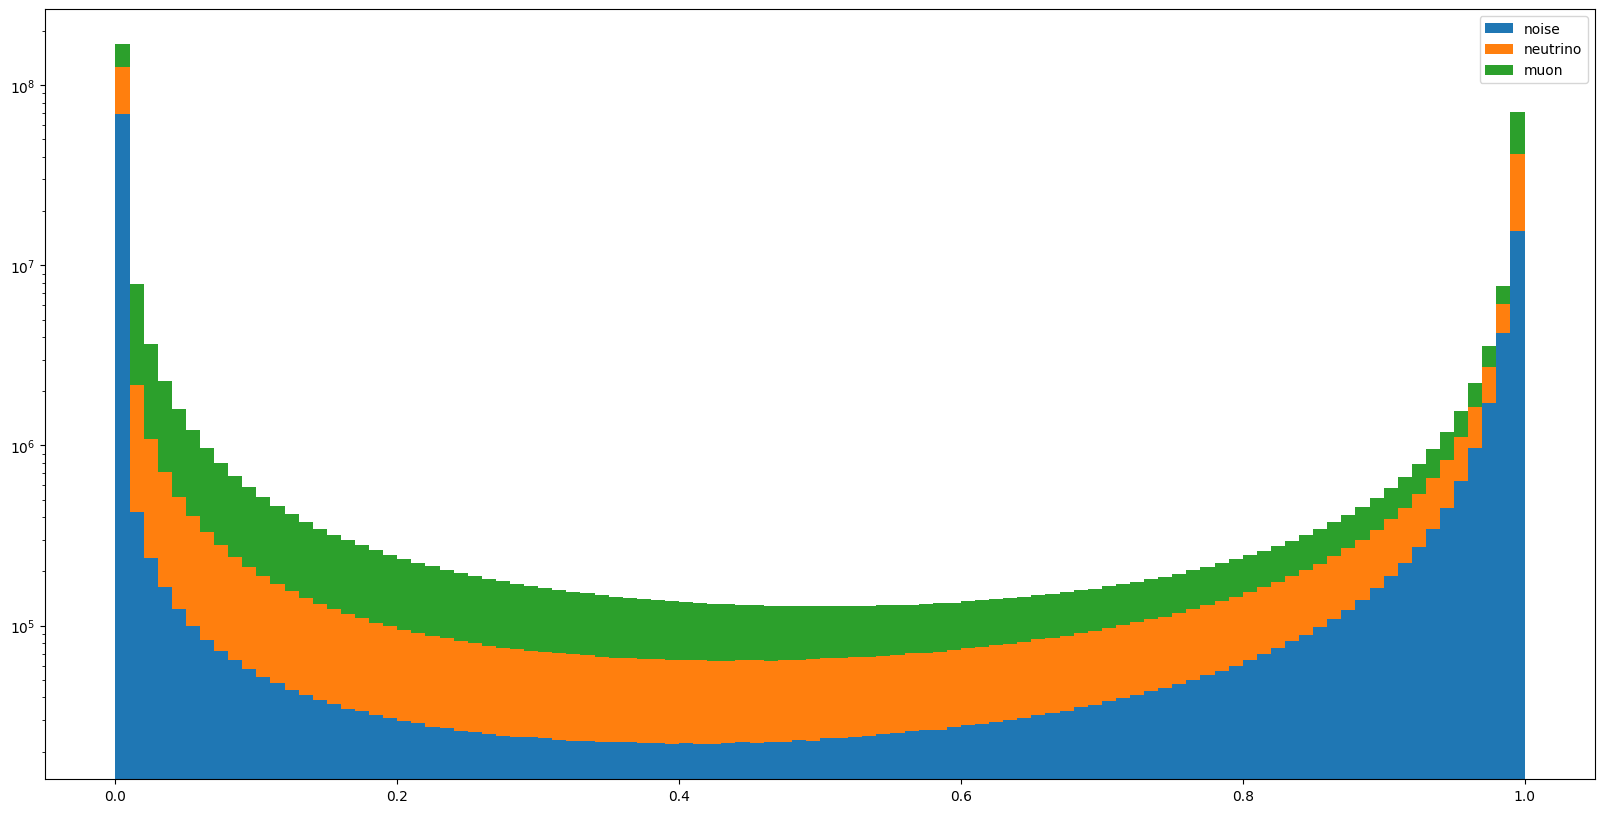

In [5]:
fig,ax = plt.subplots(figsize=(20,10))
ax.hist(feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]],bins=100, log=True, stacked=True, label=("noise", "neutrino", "muon"))
ax.set(yscale="log")
#ax.set(ylabel='Rate',yscale='log')
#ax.yaxis.set_major_formatter(ticker.EngFormatter(unit='Hz'))
ax.legend()

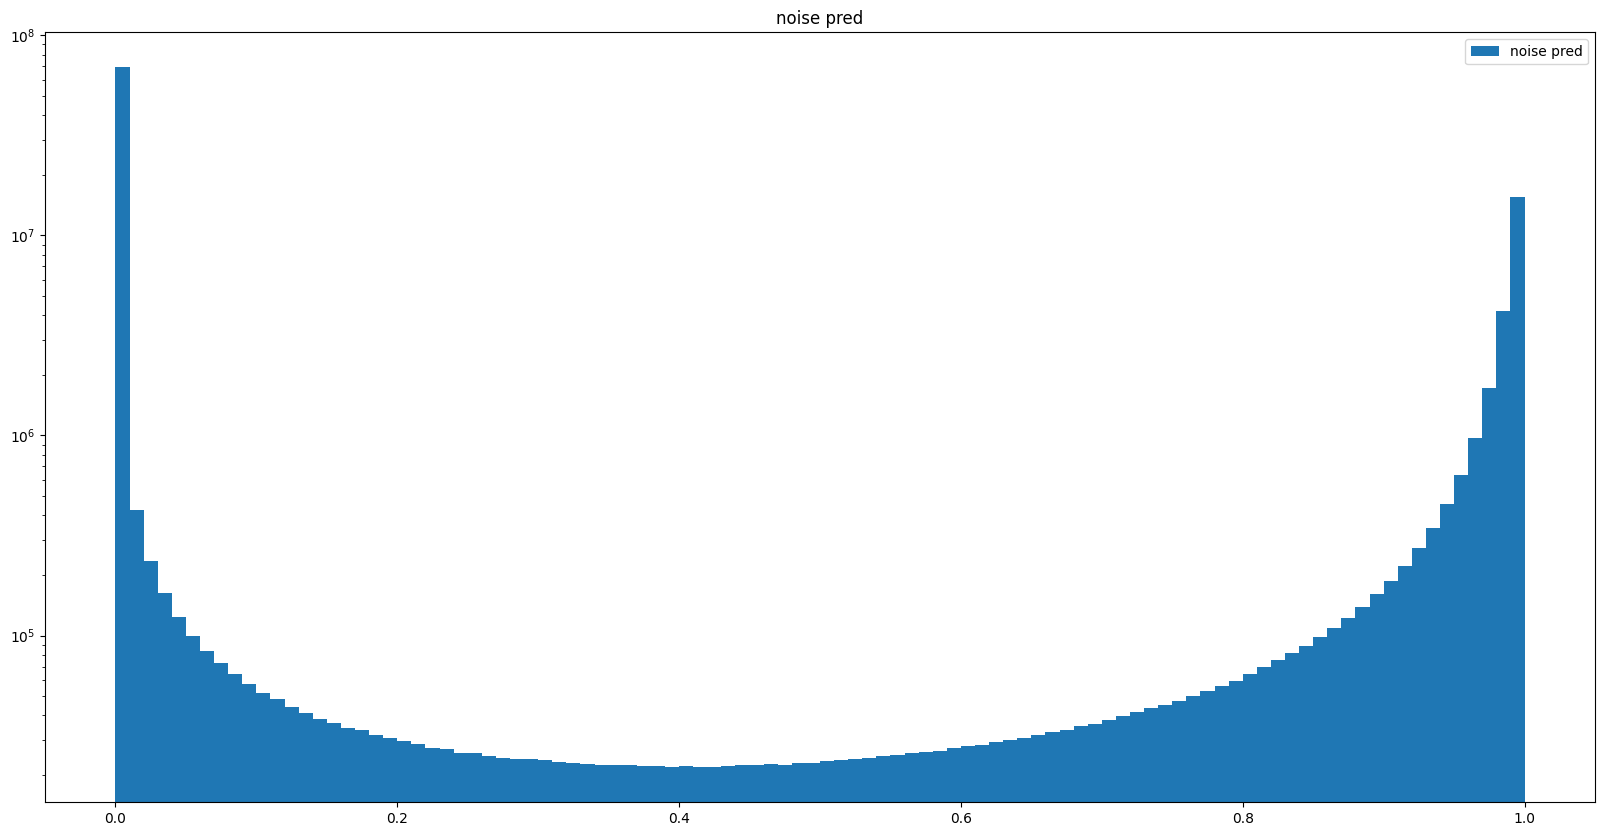

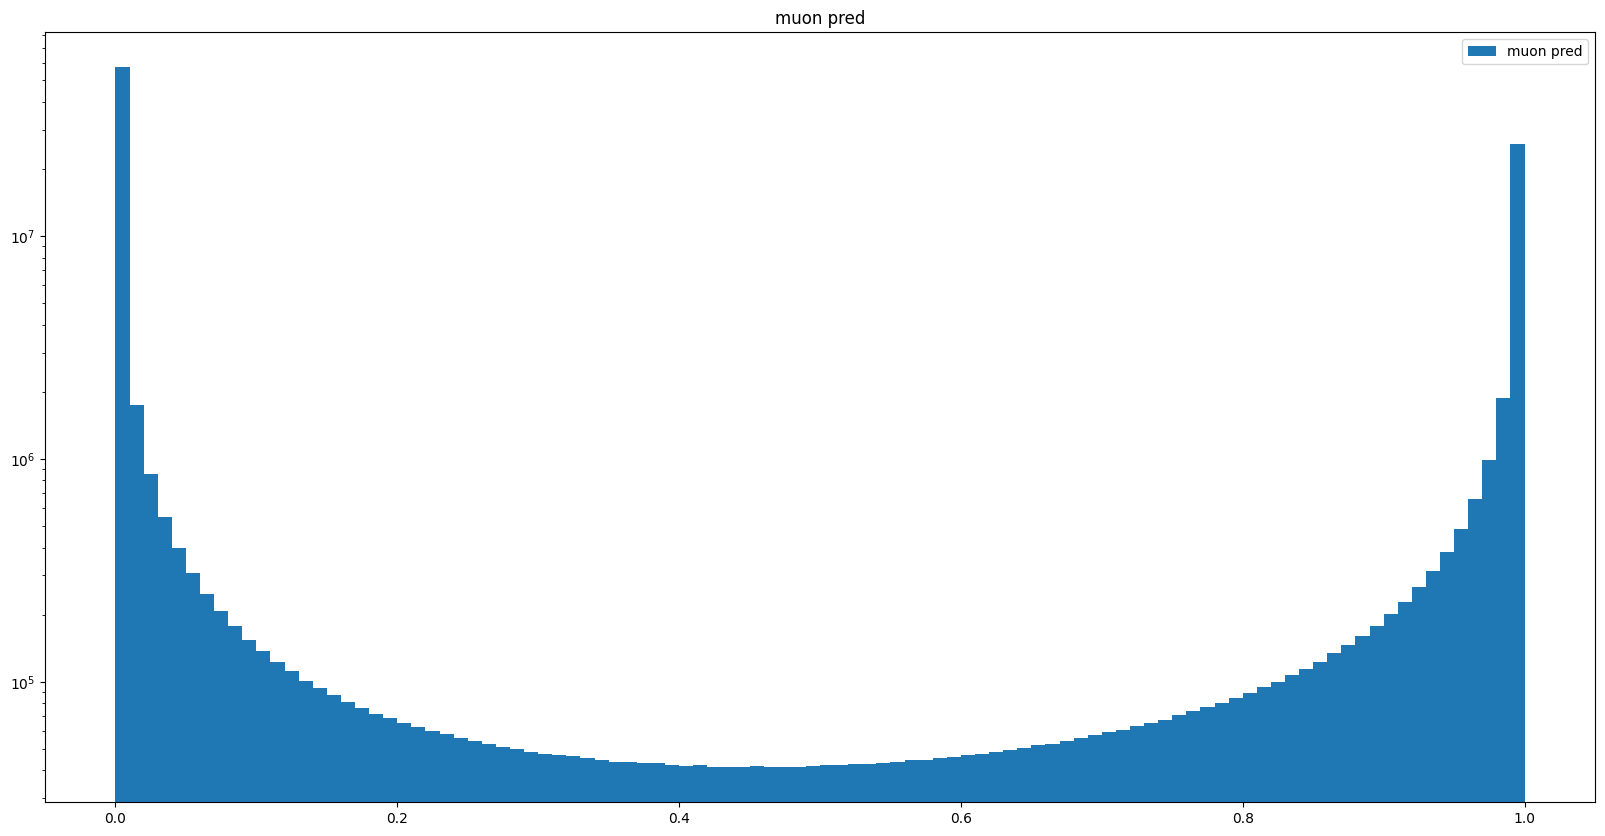

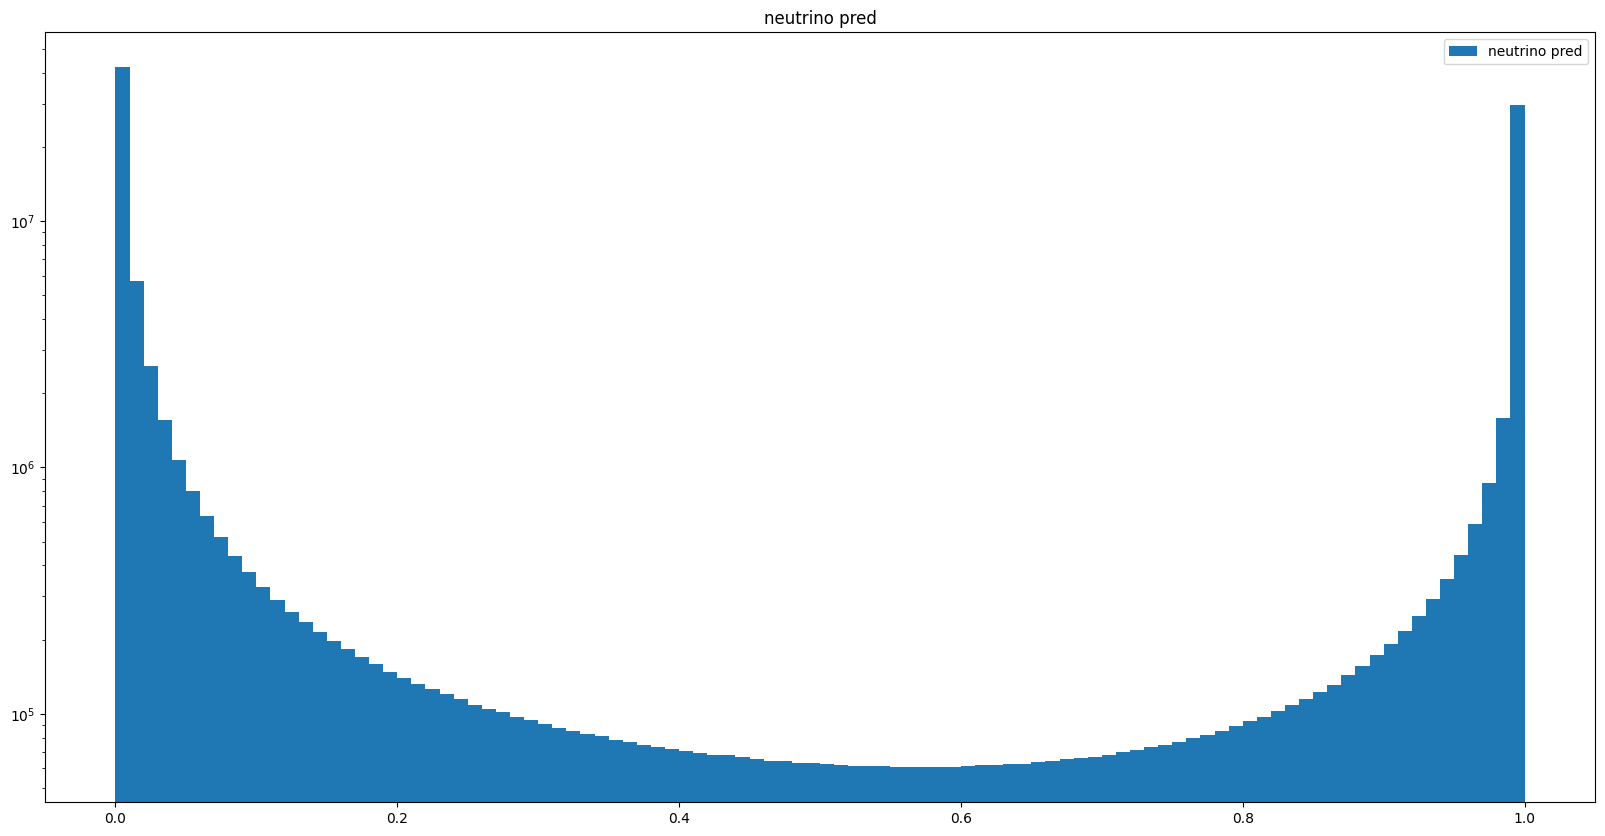

In [6]:
for i, pred in enumerate(preds):
    fig,ax = plt.subplots(figsize=(20,10))
    ax.hist(feature_data[pred], bins=100, log=True, label=(pred.replace("_"," ")[4:]))
    plt.title(pred.replace("_"," ")[4:])
    plt.legend()
    plt.savefig("/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/distributions/test_plot/"+pred.replace("_","")[3:-4]+"_inference.png")